# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------


In [19]:
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
     
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
   

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
    

  # Loop through the list of cities and perform a request for data on each
    
        #response = city_weather.json()
     


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:

    # If an error is experienced, skip the cityexcept:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | nabire
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | namibe
Processing Record 9 of Set 1 | brookings
Processing Record 10 of Set 1 | alaghsas
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | maru
Processing Record 16 of Set 1 | sint-truiden
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 18 of Set 1 | ola
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | tamanrasset
Processing Record 23 of Set 1 | tazovsky
Proces

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [25]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,maru,13.0890,5.1628,34.48,27,84,3.35,NG,1696774562
1,tara,16.1555,120.4826,25.16,90,12,1.33,PH,1696774565
2,we,-29.5369,31.1292,17.21,94,100,3.60,ZA,1696774575
3,isafjordur,66.0755,-23.1240,9.02,66,100,7.72,IS,1696774690
4,bethel,41.3712,-73.4140,13.97,73,0,7.20,US,1696774690


In [30]:
import os
# Define the folder name
folder_name = "output_data"

# Check if the folder exists, and if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,maru,13.0890,5.1628,34.48,27,84,3.35,NG,1696774562
1,tara,16.1555,120.4826,25.16,90,12,1.33,PH,1696774565
2,we,-29.5369,31.1292,17.21,94,100,3.60,ZA,1696774575
3,isafjordur,66.0755,-23.1240,9.02,66,100,7.72,IS,1696774690
4,bethel,41.3712,-73.4140,13.97,73,0,7.20,US,1696774690


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

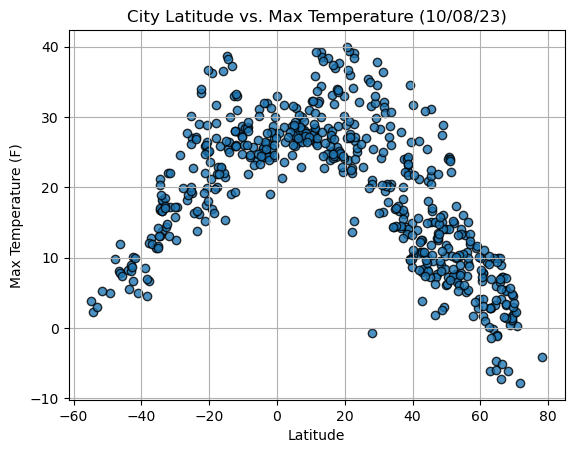

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
city_data_df["Max Temp"],
edgecolor="black", linewidths=1, marker="o", 
alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)






# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

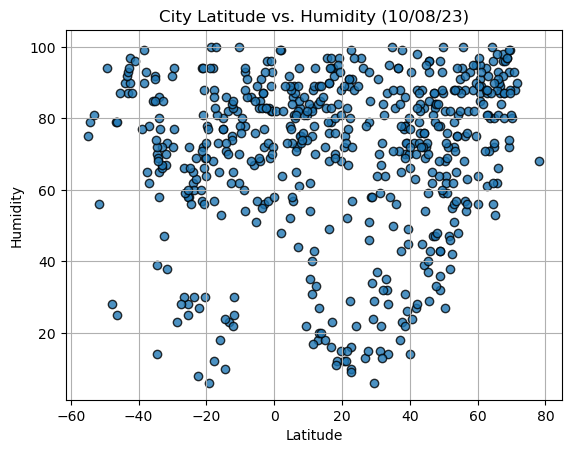

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
city_data_df["Humidity"],
edgecolor="black", linewidths = 1, marker= "o",
alpha = 0.8, label = "cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

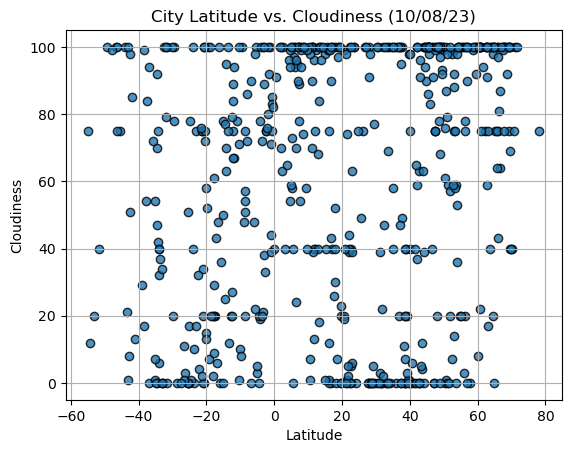

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
city_data_df["Cloudiness"],
edgecolor="black", linewidths = 1, marker= "o",
alpha = 0.8, label = "cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

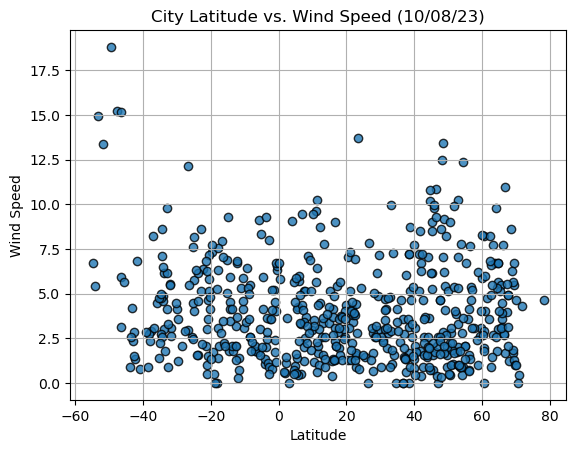

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
city_data_df["Wind Speed"],
edgecolor="black", linewidths = 1, marker= "o",
alpha = 0.8, label = "cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots


    
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [104]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,maru,13.0890,5.1628,34.48,27,84,3.35,NG,1696774562
1,tara,16.1555,120.4826,25.16,90,12,1.33,PH,1696774565
3,isafjordur,66.0755,-23.1240,9.02,66,100,7.72,IS,1696774690
4,bethel,41.3712,-73.4140,13.97,73,0,7.20,US,1696774690
5,thompson,55.7435,-97.8558,5.09,100,100,3.60,CA,1696774690


In [105]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df =city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,we,-29.5369,31.1292,17.21,94,100,3.60,ZA,1696774575
7,port alfred,-33.5906,26.8910,17.88,77,37,1.79,ZA,1696774691
8,nabire,-3.3667,135.4833,26.07,87,100,2.46,ID,1696774691
10,namibe,-15.1961,12.1522,21.43,80,50,5.05,AO,1696774691
13,adamstown,-25.0660,-130.1015,19.14,72,17,5.76,PN,1696774691


The r-squared is: -0.8377825669429171


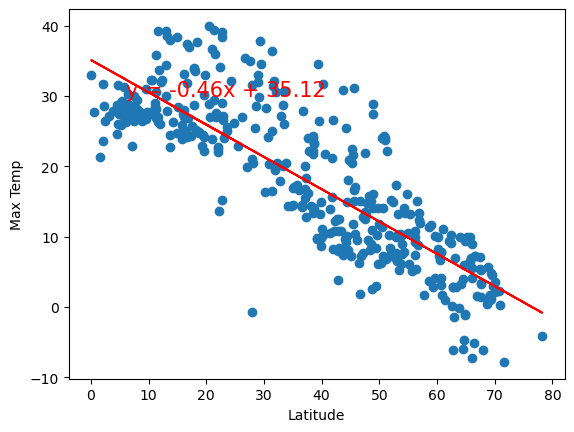

In [106]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (6,30))
#plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Max Temp', (6, 30))



The r-squared is: 0.787357929629215


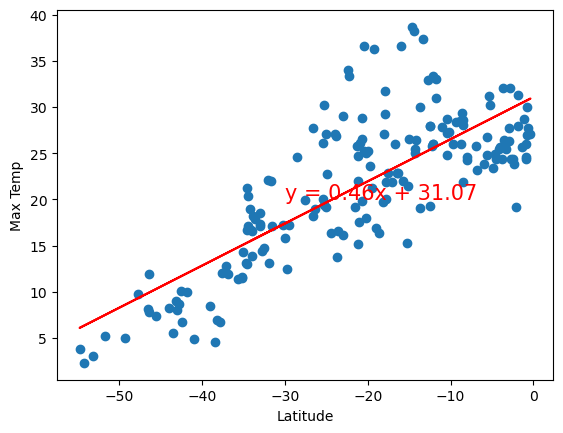

In [107]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,20))

**Discussion about the linear relationship:** In Northern hemisphere as you go away from the equator(Latitude: 0) the Max temperature decreases. The regression value of -0.83 signify a strong negative relation between latitude and Max temperature in Northern Hemishere. In the Southern hemisphere also as you go away from the equator the Max temperature decreases. he regression value of 0.78 signify a strong positive relation between latitude and Max temperature in Southern Hemishere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.177137801125491


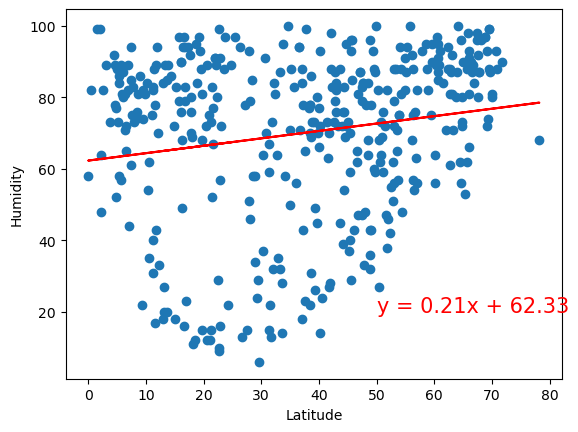

In [108]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (50, 20))

The r-squared is: 0.02518485288426292


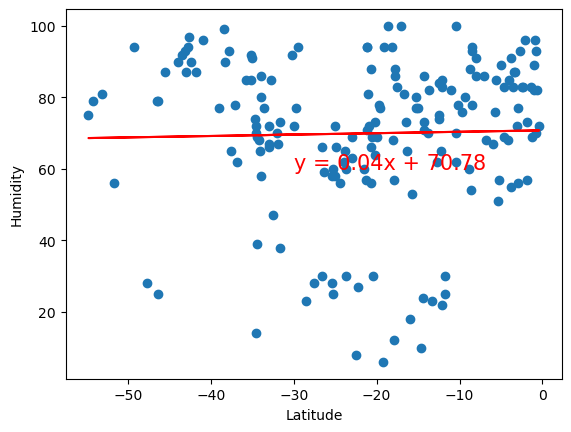

In [109]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,60))

**Discussion about the linear relationship:** In both the hemispheres Humidity and Latitude have low correlation ( In Northern Hemisphere: 0.17 and in Southern Hemisheres: 0.02) which means Humidity is not corelated to the Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.11026332699649966


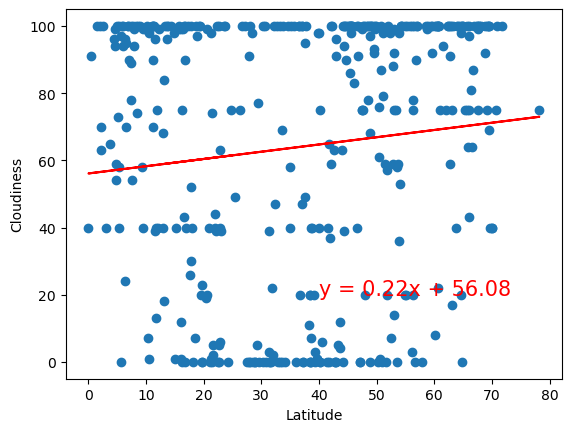

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (40, 20))

The r-squared is: 0.09422204446933011


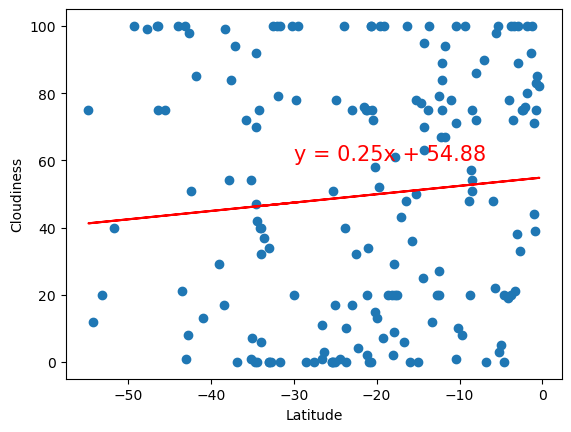

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (-30,60))

**Discussion about the linear relationship:** In both the hemispheres Cloudiness and Latitude have low correlation which means Cloudiness is not significantly related to the Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.08981143239718167


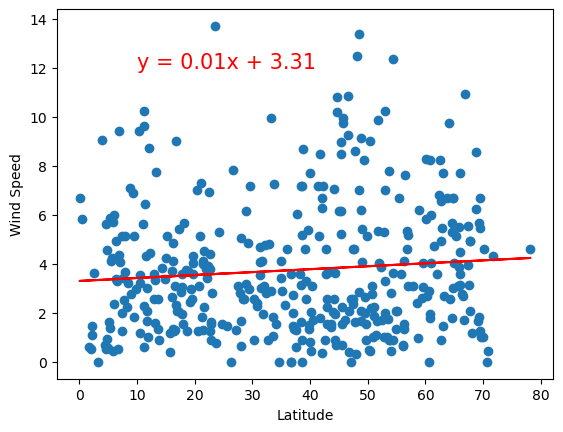

In [112]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (10, 12))

The r-squared is: -0.2606241885195681


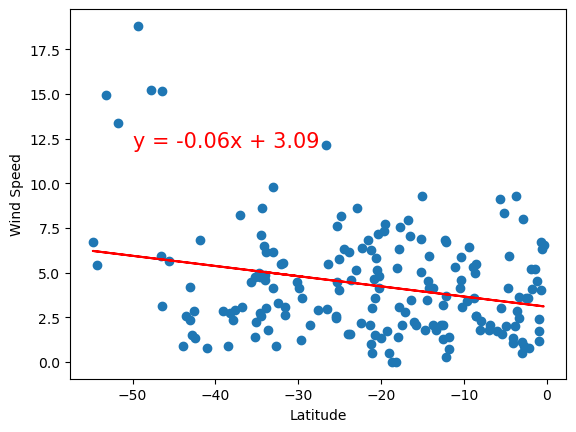

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-50,12))


**Discussion about the linear relationship:** In Northern hemisphere the Wind speed and latitude is low relation which means wind speed is affected by latitude. In southern hemisphere wind speed and latitude are negatively related meaning the wind speed is higher as you move away from the equator. Though coorealtion is low and not strongly related.